## Image Blending

Application of image pyramid is image blending. We will try to blend image of image, below half of apple to half of orange

In [10]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [11]:
apple = cv.imread('apple.jpg', 1)

In [12]:
orange = cv.imread('orange.jpg', 1)

In [13]:
print(apple.shape)
print(orange.shape)

(512, 512, 3)
(512, 512, 3)


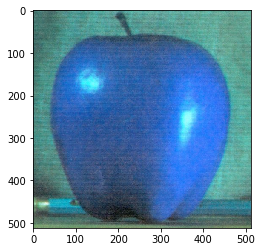

In [14]:
plt.imshow(apple)

In [16]:
# create half and half by cutting the image
#we can use numpy hstack, in form of tuple half image apple and half in image orange

apple_orange = np.hstack((apple[:,:256], orange[:,256:])) #

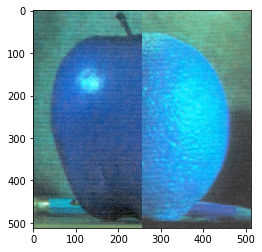

In [23]:
plt.imshow(apple_orange)

### Process to blend images using Pyramid

We have to follow 5 steps:

1. Load teh two images, here apple and orange
2. Find Gaussian Pyramid for upto 6 levels (here, apple and orange individually)
3. From Gaussian Pyramid find the Laplacian Pyramids
4. Now join left half of apple and right half of orange in each level of Laplacian Pyramid.
5. Finally, from the joint images, reconstruct the original image

### Step 2: Find the Gaussian Pyramid

In [35]:
#gaussian pyramid for Apple

apple_copy = apple.copy() 
gp_apple = [apple_copy] # apple_copy will be layers we will be creating, list to save gaussian images

In [36]:
# perform the gaussian iteration for 6 images of apple

for i in range(6):
    apple_copy = cv.pyrDown(apple_copy)
    gp_apple.append(apple_copy) #will create the list and add in gp_apple

In [37]:
#gaussian pyramid for Oranges

orange_copy = orange.copy() 
gp_orange = [orange_copy] # apple_copy will be layers we will be creating

In [38]:
# perform the gaussian iteration for 6 images of oranges

for i in range(6):
    orange_copy = cv.pyrDown(orange_copy)
    gp_orange.append(orange_copy) #will create the list and add in gp_orange

### Step 3: Find Laplacian Pyramid

In [39]:
#now we will generate the Laplacian Pyramid for Apple

apple_copy = gp_apple[5] #taking the top level of pyramid the 5th element in gaussian pyramid.
lp_apple = [apple_copy] # create list to save layers of laplacian images

In [40]:
#generate laplacian image pyramid for apple

for i in range(5, 0, -1):
    gaussian_extended = cv.pyrUp(gp_apple[i]) #created the extended variable for gaussian images
    laplacian = cv.subtract(gp_apple[i-1], gaussian_extended) #laplacian is difference between Gaussian Pyramid and expanded version
    lp_apple.append(laplacian)
    

In [41]:
#now we will generate the Laplacian Pyramid for Orange

orange_copy = gp_orange[5] #taking the top level of pyramid the 5th element in gaussian pyramid.
lp_orange = [orange_copy] # create list to save layers of laplacian images

In [56]:
gp_orange[i].shape

(16, 16, 3)

In [53]:
gp_orange[i-1].shape

(32, 32, 3)

In [54]:
gaussian_extended.shape

(512, 512, 3)

In [42]:
#generate laplacian image pyramid for apple

for i in range(5, 0, -1):
    gaussian_extended = cv.pyrUp(gp_orange[i]) #created the extended variable for gaussian images
    laplacian = cv.subtract(gp_orange[i-1], gaussian_extended) #laplacian is difference between Gaussian Pyramid and expanded version
    lp_orange.append(laplacian)

### Step 4: Join the half of these image

In [45]:
#now add left half of apple and right half of orange

apple_orange_pyramid = []
n = 0

# create two variable for two image, use zip to interate multiple variables
for apple_lap, orange_lap in zip(lp_apple, lp_orange):
    n += 1
    cols, rows, ch = apple_lap.shape #find the shape of apple image having columns, rows and channel
    laplacian = np.hstack((apple_lap[:, 0:int(cols/2)],
                          orange_lap[:, int(cols/2):]))#we typecast number of columns in apple shape, from apple index
    apple_orange_pyramid.append(laplacian) # append the list
    
    

### Step 5: Reconstruct the image

In [46]:
#reconstruct image using pyrup method

apple_orange_reconstruct = apple_orange_pyramid[0] # take the first element from joining list

for i in range (1, 6): #default steps are 1
    apple_orange_reconstruct = cv.pyrUp(apple_orange_reconstruct) #from the 0th index upto  level
    apple_orange_reconstruct = cv.add(apple_orange_pyramid[i], apple_orange_reconstruct)





In [47]:
#load the images

cv.imshow('apple', apple)
cv.imshow('orange', orange)
cv.imshow('apple_orange_reconstruct', apple_orange_reconstruct)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

-1

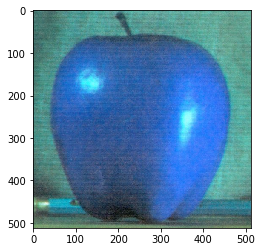

In [49]:
plt.imshow(apple)

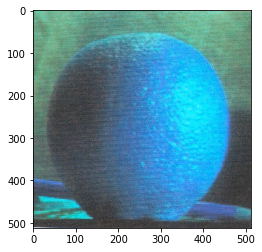

In [50]:
plt.imshow(orange)

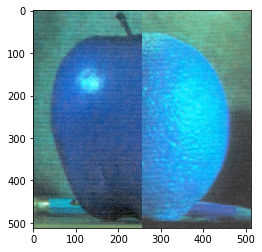

In [51]:
plt.imshow(apple_orange)

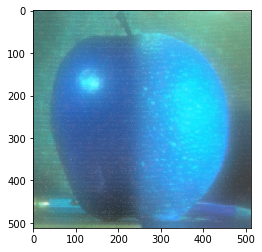

In [52]:
plt.imshow(apple_orange_reconstruct)